In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tratando_dados(filename):
    dataset = pd.read_csv(filename,delimiter='\t')
    return dataset

In [3]:
#Carregando os dados e preenchendo campos vazios
dataset = tratando_dados("BRAZIL_CITIES.csv")
Y = pd.DataFrame(dataset, columns = ["GVA_AGROPEC", "GVA_INDUSTRY","GVA_SERVICES","GVA_PUBLIC"])
dataset = dataset.drop(["GVA_AGROPEC"], axis=1)
dataset = dataset.drop(["GVA_INDUSTRY"], axis=1)
dataset = dataset.drop(["GVA_SERVICES"], axis=1)
dataset = dataset.drop(["GVA_PUBLIC"], axis=1)
dataset = dataset.drop([" GVA_TOTAL "], axis=1)
Cidades = pd.DataFrame(dataset["CITY"])
dataset = dataset.drop(["CITY"], axis=1)
X = pd.DataFrame(dataset)
Y["GVA_AGROPEC"] = Y["GVA_AGROPEC"].astype(float)
Y["GVA_AGROPEC"] = Y["GVA_AGROPEC"].astype(float)
Y["GVA_SERVICES"] = Y["GVA_SERVICES"].astype(float)
Y["GVA_PUBLIC"] = Y["GVA_PUBLIC"].astype(float)
print(X)

      CAPITAL   PAY_TV  FIXED_PHONES  COMP_A  COMP_B  COMP_C  COMP_D  COMP_E  \
0           1  2047668       5543127     739      79   31566     332     657   
1           0    98664        231302      11       2     863       1      29   
2           1  1271672       2417123     172     274    6824     235     272   
3           1   460682        920410     242      42    3269      22     130   
4           1   352371        663846     196      31    3482      57      95   
5           1   474416       1137695     226     139    5221      96     156   
6           0    57271        191288      14       7     711       9      34   
7           1   128345        397327      84      17    2059      53      63   
8           0   134816        217623      39      10     491       0      31   
9           1   333275        918158     227      34    6025     109     163   
10          1   220223        619546      83      27    2172      45      68   
11          0   237013        497122    

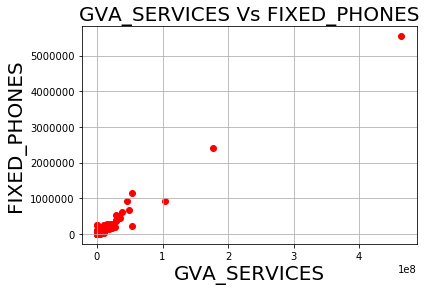

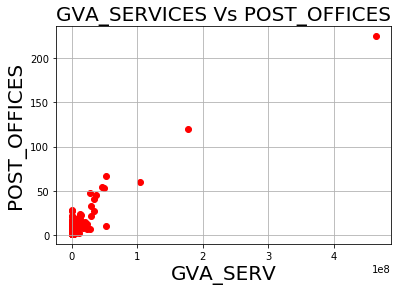

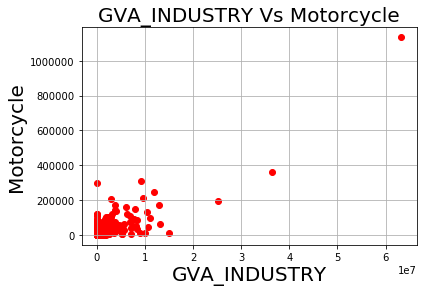

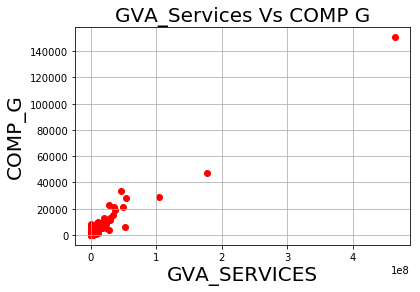

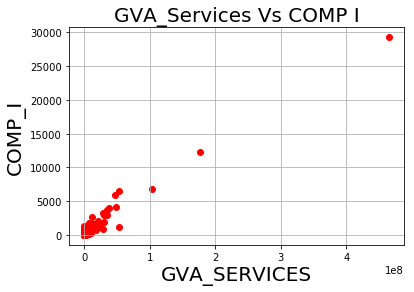

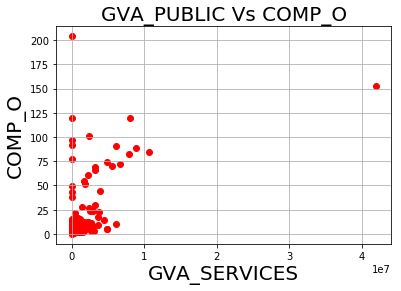

In [4]:
#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['FIXED_PHONES'], color='red')
plt.title('GVA_SERVICES Vs FIXED_PHONES', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('FIXED_PHONES', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['POST_OFFICES'], color='red')
plt.title('GVA_SERVICES Vs POST_OFFICES', fontsize=20)
plt.xlabel('GVA_SERV', fontsize=20)
plt.ylabel('POST_OFFICES', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_INDUSTRY'],X['Motorcycles'], color='red')
plt.title('GVA_INDUSTRY Vs Motorcycle', fontsize=20)
plt.xlabel('GVA_INDUSTRY', fontsize=20)
plt.ylabel('Motorcycle', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['COMP_G'], color='red')
plt.title('GVA_Services Vs COMP G', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('COMP_G', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['COMP_I'], color='red')
plt.title('GVA_Services Vs COMP I', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('COMP_I', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_PUBLIC'],X['COMP_O'], color='red')
plt.title('GVA_PUBLIC Vs COMP_O', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('COMP_O', fontsize=20)
plt.grid(True)
plt.show()

In [5]:
#Inicializando par√¢metros
X = np.array(X)
Y = np.array(Y)
print(len(X))
print(len(Y))
def initialize_parameters(lenw):
    w = np.random.randn(1,lenw)
    b = 0
    return w,b

3345
3345


In [6]:
def forward_prop(X,w,b):
    z = np.dot(w,X)+ b
    return z

In [7]:
def cost_function(z,y):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y))
    return J

In [8]:
def back_prop(X,y,z):
    m = y.shape[1]
    print(m)
    dz = (1/m)*(z-y)
    dw = np.dot(dz,X)
    db = np.sum(dz)
    return dw,db

In [9]:
def gradient_descent_update(w,b,dw,db,learning_rate):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [10]:
def linear_regression_model(X_train,Y_train,learning_rate,epochs):
    lenw = X_train.shape[0]
    w,b = initialize_parameters(lenw)
    
    for i in range(1, epochs+1):
        z_train = forward_prop(X_train,w,b)
        cost_train = cost_function(z_train,Y_train)
        dw,db = back_prop(X_train,Y_train,z_train)
        w,b = gradient_descent_update(w,b,dw,db,learning_rate)
        
        if i%10==0:
            costs_train.append(cost_train)
        MAE_train = (1/m_train)*np.sum(np.abs(z_train-Y_train))
        
        #Cost_val, MAE_val
        #z_val = forward_prop(X_val,w,b)
        #cost_val = cost_function(z_val,y_val)
        #MAE_val = (1/m_val)*np.sum(np.abs(z_val-y_val))
        
        print("Epocas"+str(i)+"/"+str(epochs)+": ")
        print("Custo Treino"+str(cost_train)+"|Validation cost "+str(cost_val))
        print("MAE cost"+str(MAE_train)+"|Validation cost "+str(MAE_val))
    plt.plot(costs_train)
    plt.xlabel("Iterations")
    plt.ylabel("Training cost")
    plt.title("Learning rate"+str(learning_r))
    plt.show()
    
linear_regression_model(X,Y,0.01,5)

ValueError: operands could not be broadcast together with shapes (1,28) (3345,4) 